In [2]:
#Importing libraries
import datetime
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report,accuracy_score,confusion_matrix
from sklearn.metrics import f1_score,precision_score, recall_score

### **Loading Data**

In [3]:
data = pd.read_csv('first.csv')


In [4]:
type(data)

pandas.core.frame.DataFrame

In [5]:
#no of rows and columns
data.shape

(410, 10)

In [6]:
#getting info about data
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 410 entries, 0 to 409
Data columns (total 10 columns):
 #   Column                     Non-Null Count  Dtype 
---  ------                     --------------  ----- 
 0   Car_Make                   410 non-null    object
 1   Car_Model                  410 non-null    object
 2   Year                       410 non-null    int64 
 3   Kms_Driven                 410 non-null    int64 
 4   Engine_Oil_Change          410 non-null    int64 
 5   Brake_Pad_Change           410 non-null    int64 
 6   Transmission_Fluid_Change  410 non-null    int64 
 7   Tire_Rotation              410 non-null    int64 
 8   Spark_Plug_Change          410 non-null    int64 
 9   Maintenance_Required       410 non-null    object
dtypes: int64(7), object(3)
memory usage: 32.2+ KB


In [7]:
#for first 5 rows
data.head()

Car_Make Car_Model  Year  Kms_Driven  Engine_Oil_Change  \
0        Hyundai     Creta  2019       45000               3300   
1          Honda     Amaze  2018       36000               6500   
2           Ford    Fiesta  2015       45000               6200   
3       Mahindra    KUV100  2020        8000               4500   
4  Maruti Suzuki  Alto K10  2018       30000               5500   

   Brake_Pad_Change  Transmission_Fluid_Change  Tire_Rotation  \
0             33000                      65000           8000   
1             31000                      48000          26000   
2             29000                      42000          24000   
3             35000                      85000           5000   
4             28000                      42000          23000   

   Spark_Plug_Change Maintenance_Required  
0              85000              Absence  
1              50000             Presence  
2              49000             Presence  
3             105000              Absence  
4              46000              Absence

In [8]:
#for last 5 rows
data.tail()

Car_Make                Car_Model  Year  Kms_Driven  Engine_Oil_Change  \
405  Mahindra                   KUV100  2012       75000               8000   
406   Renault                     Kwid  2015       52000               7500   
407      Tata                 Nexon EV  2019       30000               5800   
408   Bentley  Continental Flying Spur  2015       30000               6000   
409     Honda                     City  2016       45000               6500   

     Brake_Pad_Change  Transmission_Fluid_Change  Tire_Rotation  \
405             70000                     120000          40000   
406             36000                      56000          32000   
407             30000                      44000          25000   
408             28000                      42000          22000   
409             30000                      46000          25000   

     Spark_Plug_Change Maintenance_Required  
405             140000              Absence  
406              58000             Presence  
407              49000             Presence  
408              45000             Presence  
409              49000             Presence

In [9]:
#statistical measures about the data
data.describe().T

count          mean           std      min  \
Year                       410.0   2016.458537      3.195273   2010.0   
Kms_Driven                 410.0  40953.658537  18535.244925   3000.0   
Engine_Oil_Change          410.0   5637.560976   1408.827879   2400.0   
Brake_Pad_Change           410.0  36178.048780  14606.158265  15000.0   
Transmission_Fluid_Change  410.0  62639.024390  28018.705575  27000.0   
Tire_Rotation              410.0  23042.682927  10664.992323    500.0   
Spark_Plug_Change          410.0  73470.731707  34649.772304  37000.0   

                               25%      50%       75%       max  
Year                        2014.0   2017.0    2019.0    2023.0  
Kms_Driven                 28000.0  40000.0   52000.0  100000.0  
Engine_Oil_Change           4800.0   5500.0    6500.0   10000.0  
Brake_Pad_Change           26000.0  30000.0   42750.0   85000.0  
Transmission_Fluid_Change  40000.0  51000.0   85000.0  135000.0  
Tire_Rotation              19000.0  22000.0   28000.0   60000.0  
Spark_Plug_Change          45000.0  55000.0  104750.0  155000.0

In [10]:
##feature engineering
#To get null values of column
data.isnull().sum()

Car_Make                     0
Car_Model                    0
Year                         0
Kms_Driven                   0
Engine_Oil_Change            0
Brake_Pad_Change             0
Transmission_Fluid_Change    0
Tire_Rotation                0
Spark_Plug_Change            0
Maintenance_Required         0
dtype: int64

<Axes: >

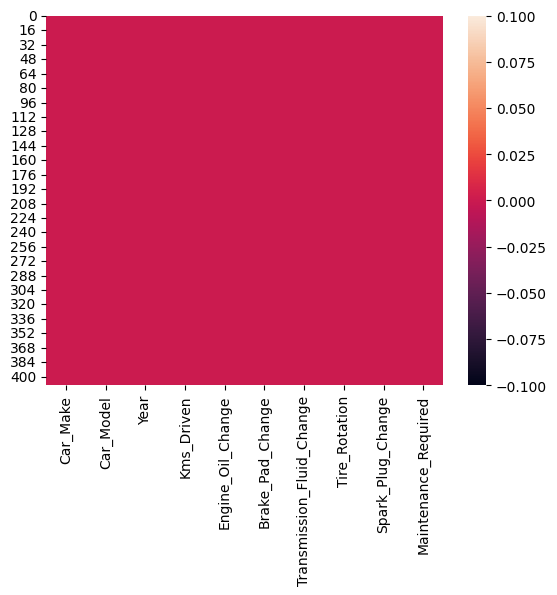

In [11]:
#heatmap to show null values
sns.heatmap(data.isnull())
#as dataset don't have any null value so it is showing the red colour which is 0.0 according to scale

In [12]:
data.dtypes

Car_Make                     object
Car_Model                    object
Year                          int64
Kms_Driven                    int64
Engine_Oil_Change             int64
Brake_Pad_Change              int64
Transmission_Fluid_Change     int64
Tire_Rotation                 int64
Spark_Plug_Change             int64
Maintenance_Required         object
dtype: object

### **Data Cleaning And Visualization**

In [13]:
data = data.drop('Car_Make', axis=1)


In [14]:
data = data.drop('Car_Model', axis=1)


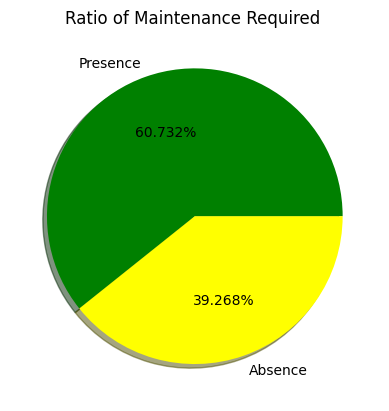

In [15]:
#To show the Fuel type using pie chart
plt.pie(x = data['Maintenance_Required'].value_counts() ,autopct='%1.3f%%' ,labels=['Presence', 'Absence'], colors=['green', 'yellow'], shadow=True)
plt.title('Ratio of Maintenance Required ')
plt.show()


<Axes: xlabel='Maintenance_Required', ylabel='count'>

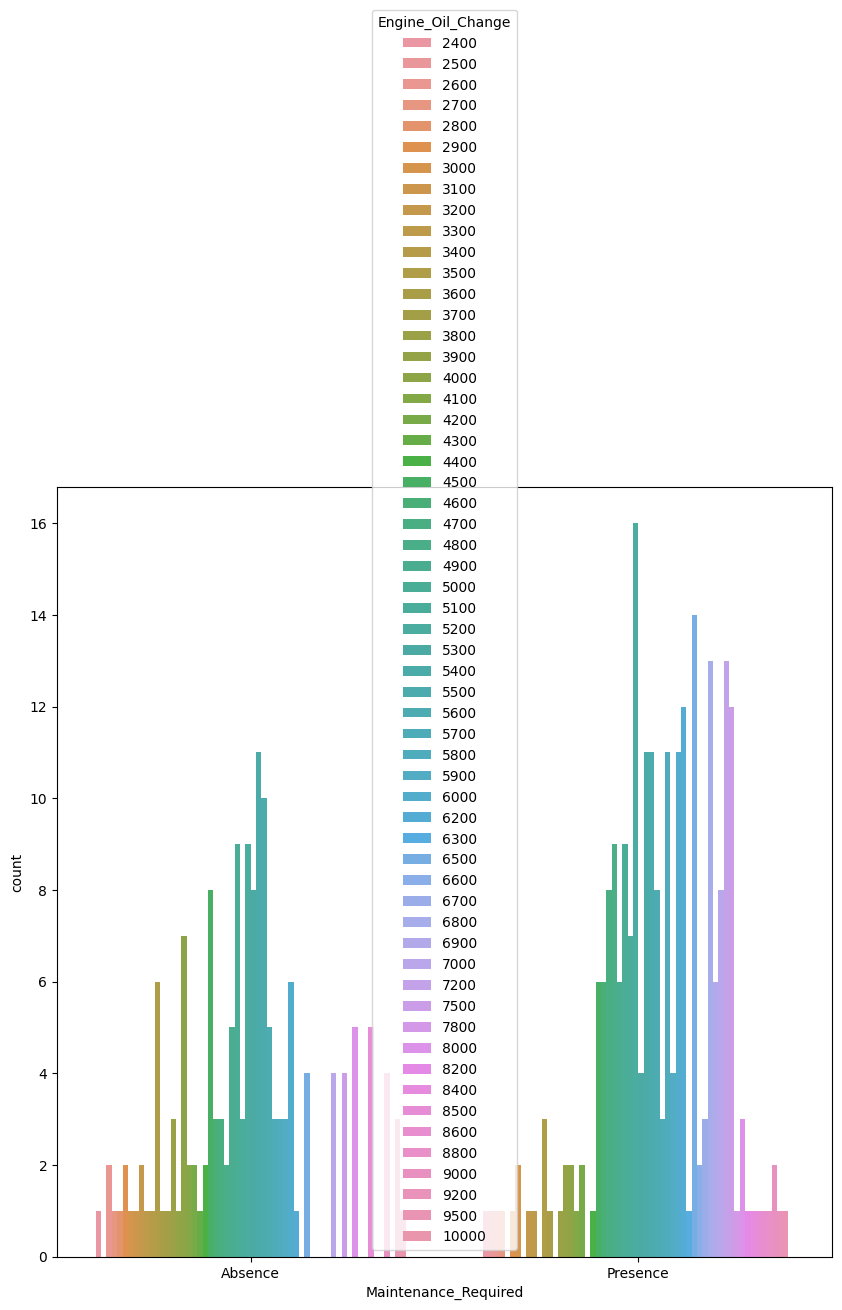

In [16]:
#count graph for heart disease vs Thallium
plt.figure(figsize=(10,10))
sns.countplot(data=data,hue='Engine_Oil_Change',x='Maintenance_Required')

In [17]:
data["Year_old"]=2024-data["Year"]

In [18]:
data = data.drop('Year', axis=1)


In [19]:
# FMaintenance required to numeric using LabelEncoder
from sklearn.preprocessing import LabelEncoder
encoder = LabelEncoder()
data["Maintenance_Required"] = encoder.fit_transform(data["Maintenance_Required"])

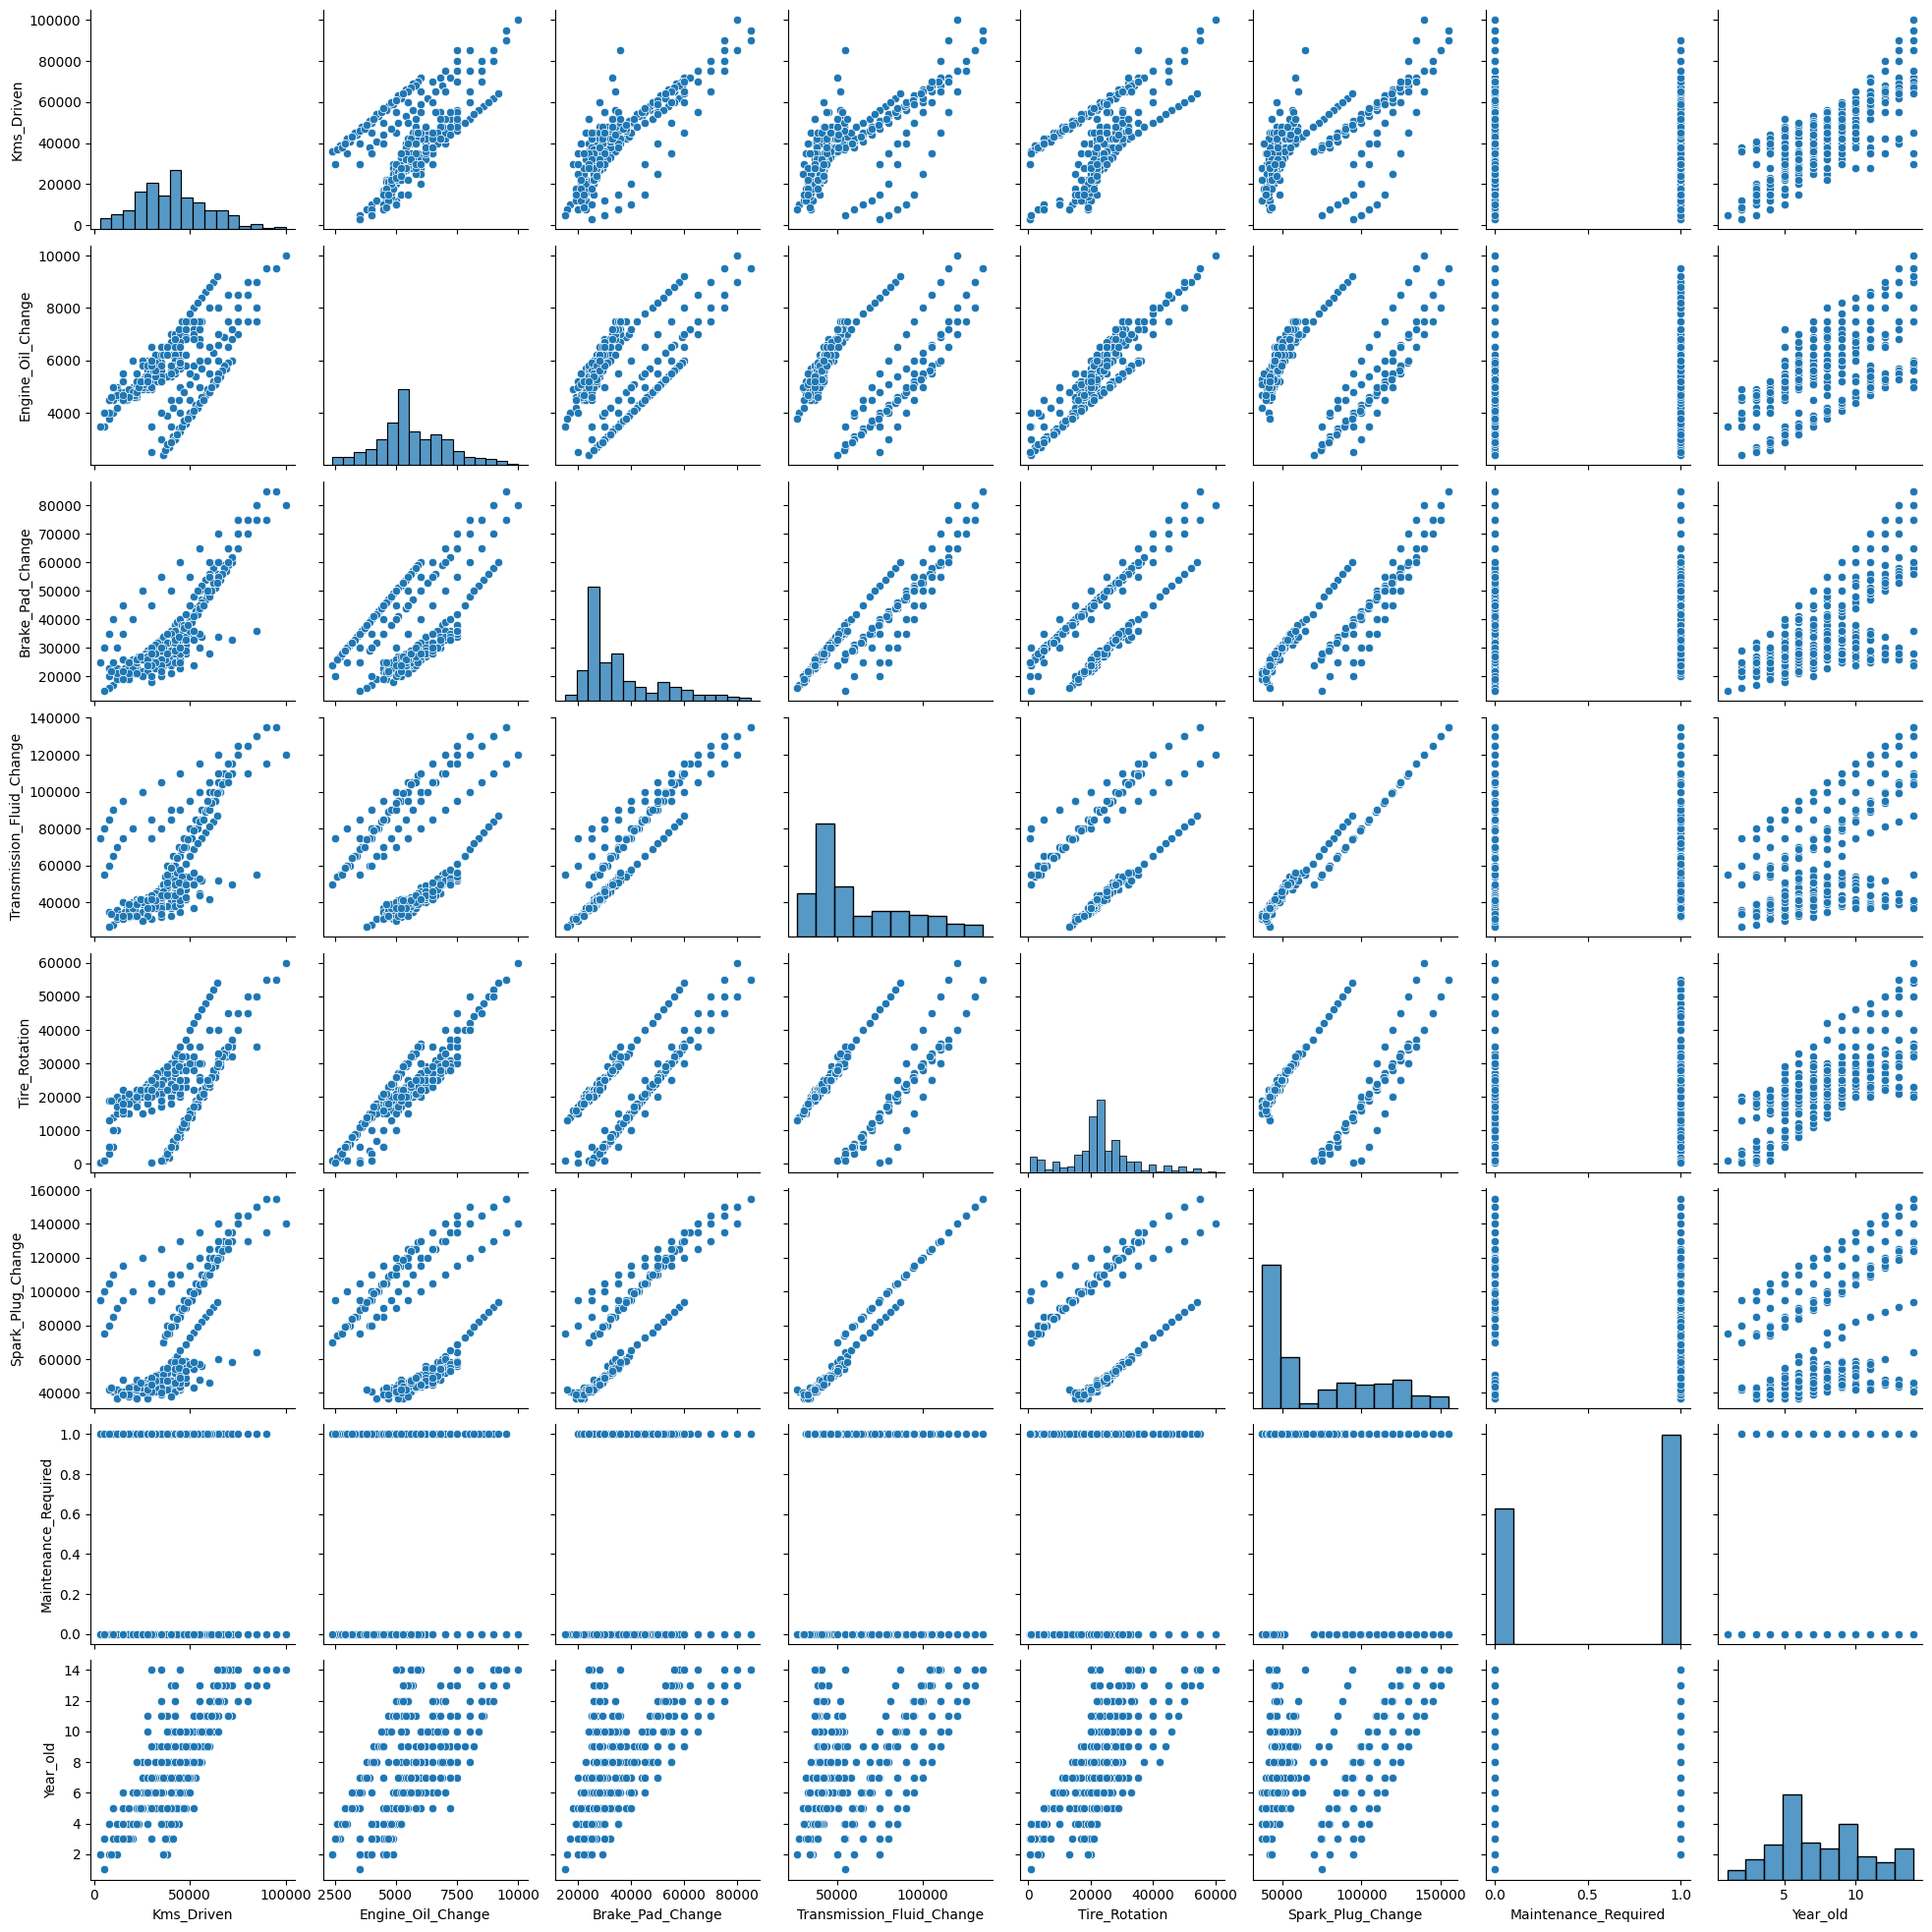

In [20]:
sns.pairplot(data)
# This shows the relationship for (n,2) combination of variable in a DataFrame 
# as a matrix of plots and the diagonal plots are the univariate plots.

array([[<Axes: title={'center': 'Kms_Driven'}>,
        <Axes: title={'center': 'Engine_Oil_Change'}>,
        <Axes: title={'center': 'Brake_Pad_Change'}>],
       [<Axes: title={'center': 'Transmission_Fluid_Change'}>,
        <Axes: title={'center': 'Tire_Rotation'}>,
        <Axes: title={'center': 'Spark_Plug_Change'}>],
       [<Axes: title={'center': 'Maintenance_Required'}>,
        <Axes: title={'center': 'Year_old'}>, <Axes: >]], dtype=object)

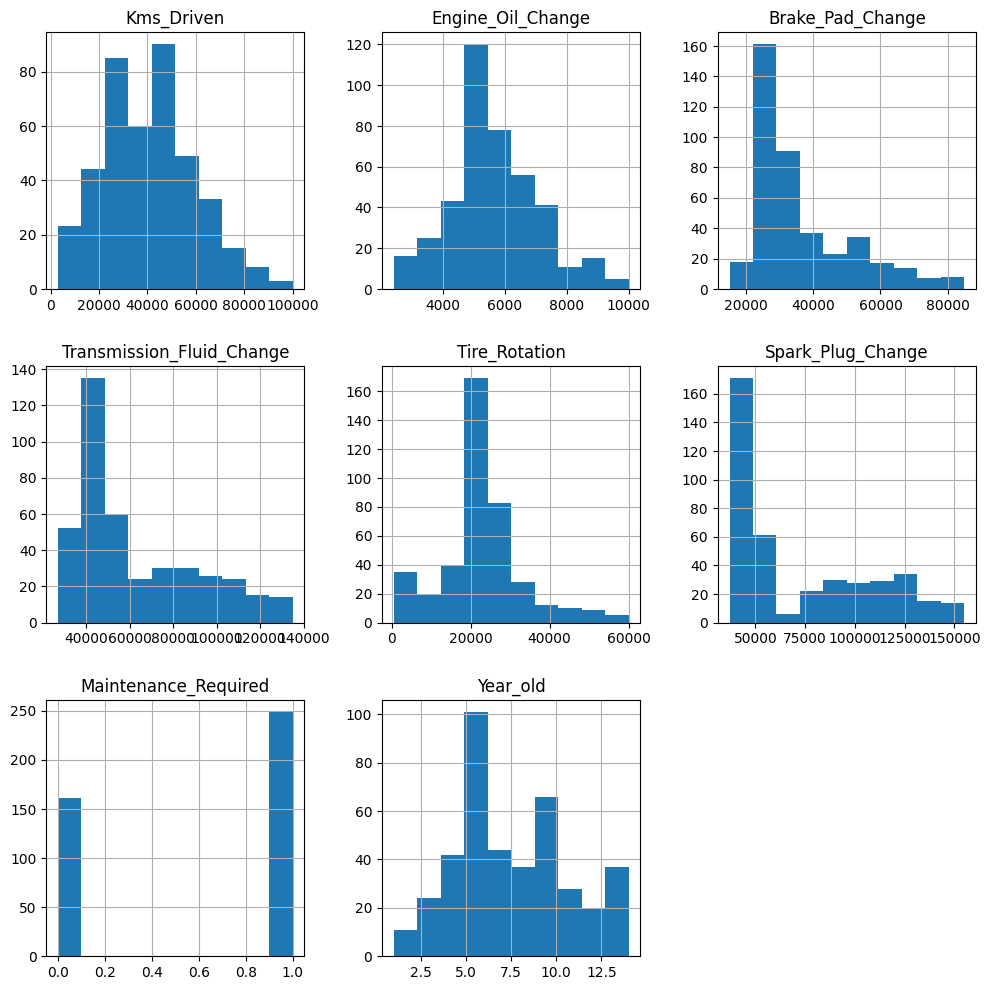

In [21]:
#to visualize the feature using histogram
data.hist(figsize=(12,12))

In [22]:
print(data.corr())


                           Kms_Driven  Engine_Oil_Change  Brake_Pad_Change  \
Kms_Driven                   1.000000           0.558380          0.829576   
Engine_Oil_Change            0.558380           1.000000          0.604292   
Brake_Pad_Change             0.829576           0.604292          1.000000   
Transmission_Fluid_Change    0.721275           0.346811          0.932447   
Tire_Rotation                0.666704           0.916767          0.690530   
Spark_Plug_Change            0.682945           0.241353          0.891895   
Maintenance_Required        -0.040053           0.152439         -0.202791   
Year_old                     0.816175           0.652886          0.695791   

                           Transmission_Fluid_Change  Tire_Rotation  \
Kms_Driven                                  0.721275       0.666704   
Engine_Oil_Change                           0.346811       0.916767   
Brake_Pad_Change                            0.932447       0.690530   
Transmission_

<Axes: >

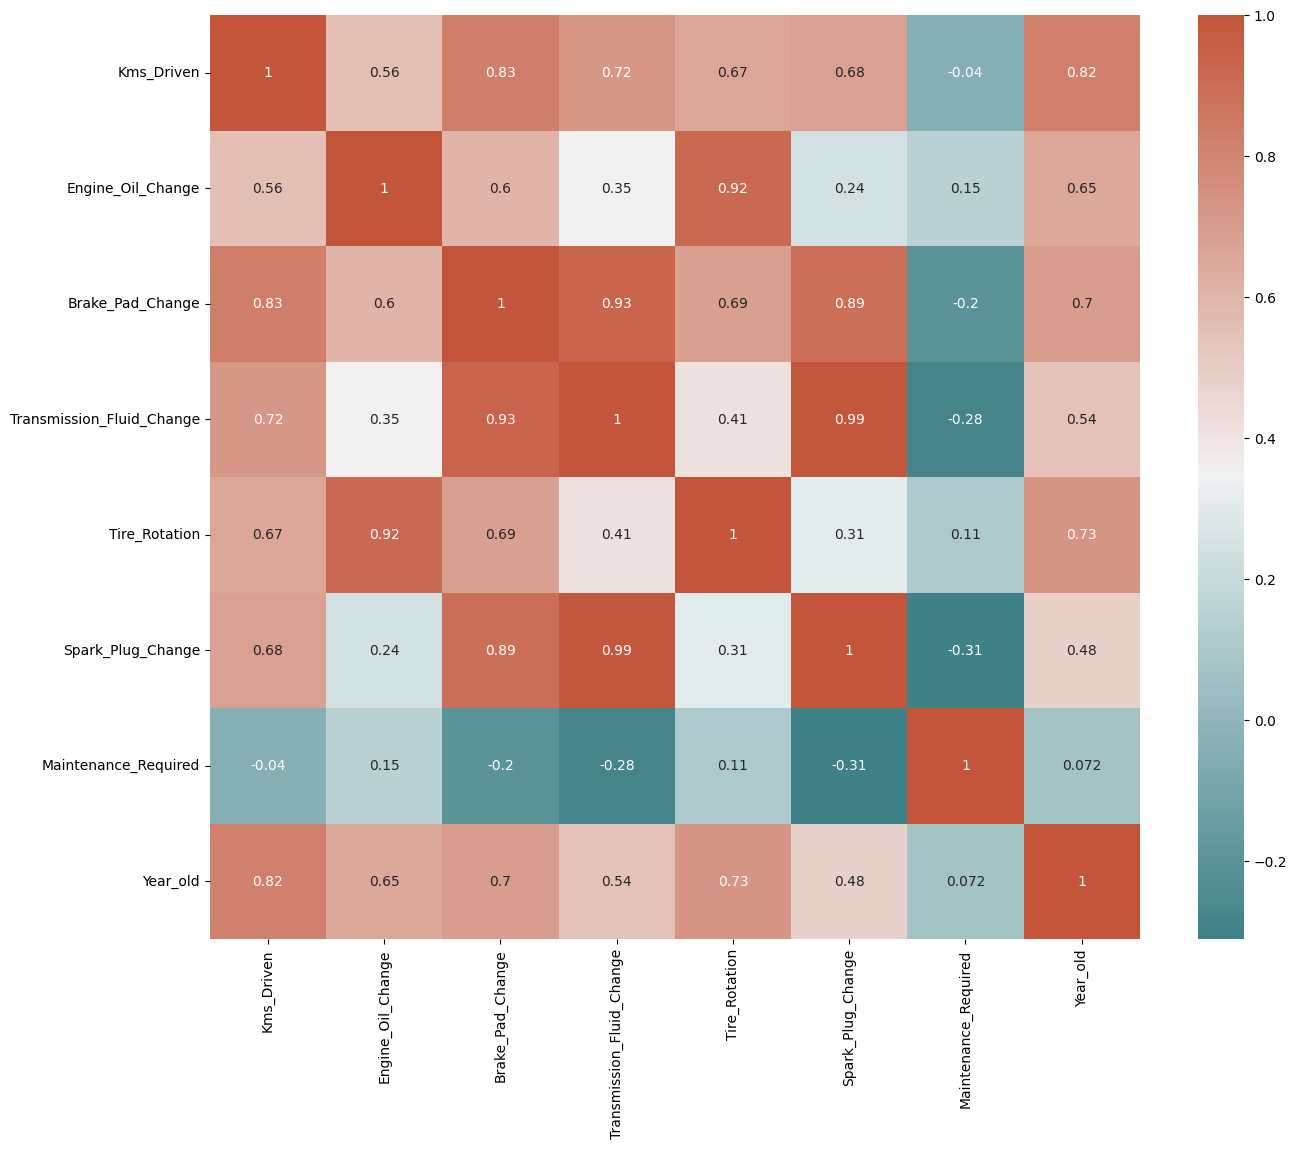

In [23]:
#correlation matrix
#it is to find the dependency of column to target value
corr = data.corr()
plt.subplots(figsize=(15,12))
sns.heatmap(corr, xticklabels=corr.columns, yticklabels=corr.columns, annot=True, cmap=sns.diverging_palette(200, 20, as_cmap=True))

In [24]:
#Training and testing
X = data.drop('Maintenance_Required',axis=1)
y = data['Maintenance_Required']

In [25]:
# Checking For Important Features!
from sklearn.ensemble import ExtraTreesRegressor
model = ExtraTreesRegressor()
model.fit(X,y)

ExtraTreesRegressor()

In [26]:
model.feature_importances_

array([0.10683443, 0.18436907, 0.10101969, 0.1463378 , 0.15284255,
       0.148427  , 0.16016947])

<Axes: >

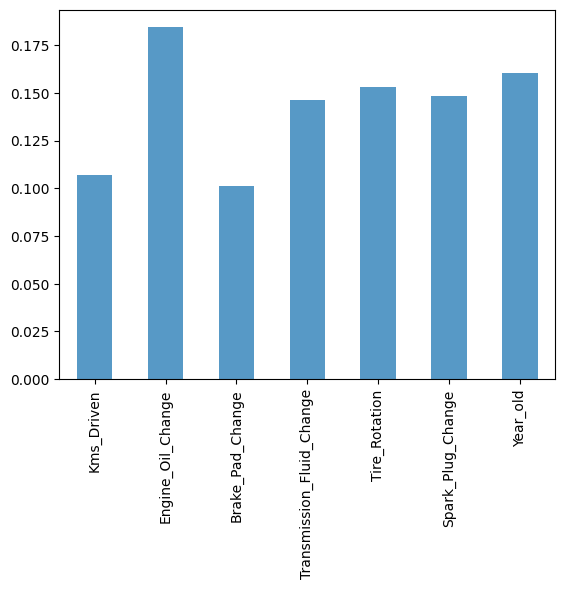

In [27]:
pd.Series(model.feature_importances_, index=X.columns).plot(kind='bar',alpha=0.75, rot=90)

In [28]:
#statistical measures about the data
data.describe().T

count          mean           std      min  \
Kms_Driven                 410.0  40953.658537  18535.244925   3000.0   
Engine_Oil_Change          410.0   5637.560976   1408.827879   2400.0   
Brake_Pad_Change           410.0  36178.048780  14606.158265  15000.0   
Transmission_Fluid_Change  410.0  62639.024390  28018.705575  27000.0   
Tire_Rotation              410.0  23042.682927  10664.992323    500.0   
Spark_Plug_Change          410.0  73470.731707  34649.772304  37000.0   
Maintenance_Required       410.0      0.607317      0.488944      0.0   
Year_old                   410.0      7.541463      3.195273      1.0   

                               25%      50%       75%       max  
Kms_Driven                 28000.0  40000.0   52000.0  100000.0  
Engine_Oil_Change           4800.0   5500.0    6500.0   10000.0  
Brake_Pad_Change           26000.0  30000.0   42750.0   85000.0  
Transmission_Fluid_Change  40000.0  51000.0   85000.0  135000.0  
Tire_Rotation              19000.0  22000.0   28000.0   60000.0  
Spark_Plug_Change          45000.0  55000.0  104750.0  155000.0  
Maintenance_Required           0.0      1.0       1.0       1.0  
Year_old                       5.0      7.0      10.0      14.0

In [29]:
#Spliting the data
X_train,X_test,y_train,y_test= train_test_split(X,y,test_size=0.2,random_state=6)

In [30]:
# features scaling
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train=sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [31]:
print("Shape of X_train",X_train.shape)
print("Shape of y_train",y_train.shape)
print("Shape of X_test",X_test.shape)
print("Shape of y_test",y_test.shape)

Shape of X_train (328, 7)
Shape of y_train (328,)
Shape of X_test (82, 7)
Shape of y_test (82,)


Decision Tree
ACCURACY score on train data 79.8780487804878
Accuracy Score on test data 71.95121951219512
Classification Report
               precision    recall  f1-score   support

           0       0.57      0.79      0.67        29
           1       0.86      0.68      0.76        53

    accuracy                           0.72        82
   macro avg       0.72      0.74      0.71        82
weighted avg       0.76      0.72      0.73        82
 

Confusion Matrix
 [[23  6]
 [17 36]]


<Axes: >

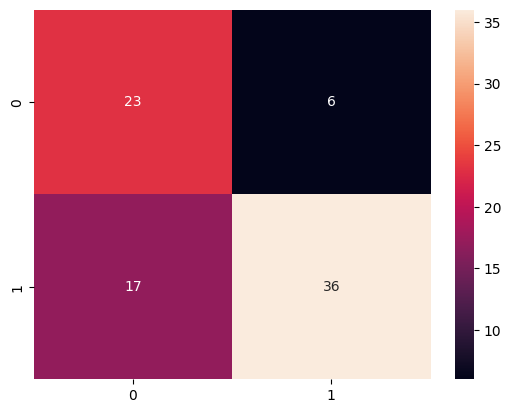

In [32]:
#Decision Tree
print("Decision Tree")
from sklearn.tree import DecisionTreeClassifier
tree=DecisionTreeClassifier( max_depth=5)
tree.fit(X_train, y_train)
pred=tree.predict(X_test)
acc=accuracy_score(y_test,pred)
#print("Acurray on test set: {:.2f}%".format(acc*100))
print("ACCURACY score on train data",accuracy_score(y_train, tree.predict(X_train))*100)
print("Accuracy Score on test data", accuracy_score(y_test,pred)*100)
print("Classification Report\n",classification_report(y_test,pred),"\n")
print("Confusion Matrix\n",confusion_matrix(y_test,pred))
sns.heatmap(confusion_matrix(y_test,pred),annot=True,fmt='d')

Naive Bayes
ACCURACY score on train data 66.76829268292683
ACCURACY on test data 68.29268292682927
Classification Report
               precision    recall  f1-score   support

           0       0.55      0.62      0.58        29
           1       0.78      0.72      0.75        53

    accuracy                           0.68        82
   macro avg       0.66      0.67      0.66        82
weighted avg       0.69      0.68      0.69        82
 

Confusion Matrix [[18 11]
 [15 38]]


<Axes: >

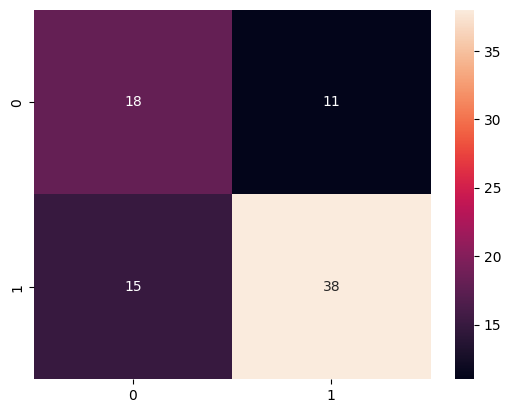

In [33]:
##Naive Bayes
print("Naive Bayes")
from sklearn.naive_bayes import GaussianNB
nb_model = GaussianNB()
nb_model.fit(X_train, y_train)
pred = nb_model.predict(X_test)
print("ACCURACY score on train data",accuracy_score(y_train, nb_model.predict(X_train))*100)
print("ACCURACY on test data",accuracy_score(y_test, pred)*100)
print("Classification Report\n",classification_report(y_test,pred),"\n")
print("Confusion Matrix",confusion_matrix(y_test,pred))
sns.heatmap(confusion_matrix(y_test,pred),annot=True,fmt='d')

Logistic Regression
ACCURACY score on train data 69.8170731707317
Accuracy Score on test data 74.39024390243902
Classification Report
               precision    recall  f1-score   support

           0       0.61      0.76      0.68        29
           1       0.85      0.74      0.79        53

    accuracy                           0.74        82
   macro avg       0.73      0.75      0.73        82
weighted avg       0.76      0.74      0.75        82
 

Confusion Matrix [[22  7]
 [14 39]]


<Axes: >

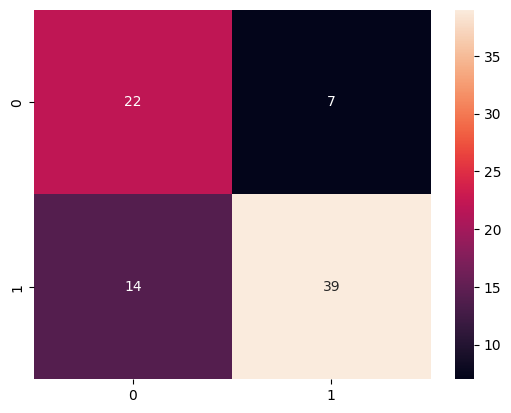

In [34]:
#Logistic Regression
print("Logistic Regression")
from sklearn.linear_model import LogisticRegression
lr_model=LogisticRegression()
#training the logistic regression model with training data
lr_model.fit(X_train,y_train)
pred = lr_model.predict(X_test)
print("ACCURACY score on train data",accuracy_score(y_train, lr_model.predict(X_train))*100)
print("Accuracy Score on test data", accuracy_score(y_test,pred)*100)
print("Classification Report\n",classification_report(y_test,pred),"\n")
print("Confusion Matrix",confusion_matrix(y_test,pred))
sns.heatmap(confusion_matrix(y_test,pred),annot=True,fmt='d')

In [35]:
#to find the best score of KNN - to get best value of k
from sklearn.neighbors import KNeighborsClassifier
knn_scores=[]
for k in range(1,40):
  knnn=KNeighborsClassifier(n_neighbors=k)
  knnn.fit(X_train,y_train)
  knn_scores.append(knnn.score(X_test,y_test))

print(f'Best choice of k: {np.argmax(knn_scores)+1}')

Best choice of k: 6


KNN
ACCURACY score on train data 78.65853658536585
Accuracy Score on test data 80.48780487804879
Classification Report
               precision    recall  f1-score   support

           0       0.65      0.97      0.78        29
           1       0.97      0.72      0.83        53

    accuracy                           0.80        82
   macro avg       0.81      0.84      0.80        82
weighted avg       0.86      0.80      0.81        82
 

Confusion Matrix
 [[28  1]
 [15 38]]


<Axes: >

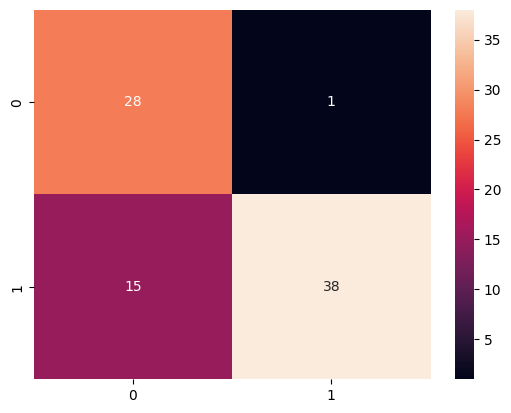

In [36]:
#KNN
print("KNN")
from sklearn.neighbors import KNeighborsClassifier
KNN=KNeighborsClassifier(n_neighbors=6,metric="minkowski")
KNN.fit(X_train,y_train)
pred=KNN.predict(X_test)
print("ACCURACY score on train data",accuracy_score(y_train, KNN.predict(X_train))*100)
print("Accuracy Score on test data", accuracy_score(y_test,pred)*100)
print("Classification Report\n",classification_report(y_test,pred),"\n")
print("Confusion Matrix\n",confusion_matrix(y_test,pred))
sns.heatmap(confusion_matrix(y_test,pred),annot=True,fmt='d')


In [37]:
#to get best n_estimators for random forest
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import RandomizedSearchCV
rf_g={
    'n_estimators': range(1,1000,100),
}
rf=RandomForestClassifier()
rf_ran = RandomizedSearchCV(param_distributions=rf_g,estimator=rf,scoring="accuracy",verbose=0,n_iter=100,cv=4)
rf_ran.fit(X_train,y_train)
best_params=rf_ran.best_params_
print(best_params)

{'n_estimators': 701}


Random Forest Classification
ACCURACY score on train data 77.7439024390244
Accuracy Score on test data 73.17073170731707
Classification Report
               precision    recall  f1-score   support

           0       0.59      0.76      0.67        29
           1       0.84      0.72      0.78        53

    accuracy                           0.73        82
   macro avg       0.72      0.74      0.72        82
weighted avg       0.76      0.73      0.74        82
 

Confusion Matrix [[22  7]
 [15 38]]


<Axes: >

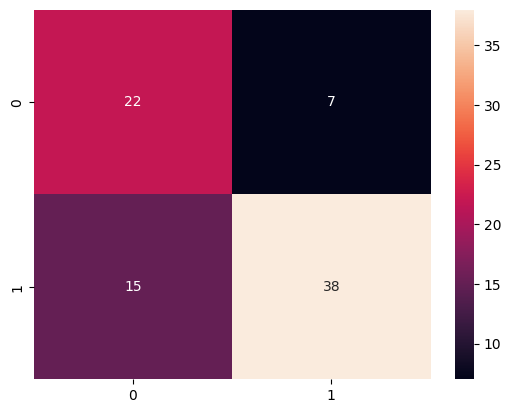

In [38]:
#Random Forest classifier
print("Random Forest Classification")
from sklearn.ensemble import RandomForestClassifier
rf_classifier = RandomForestClassifier(n_estimators = 501, criterion = 'entropy', random_state = 101,max_depth=4)
rf_classifier.fit(X_train, y_train)
pred = rf_classifier.predict(X_test)
print("ACCURACY score on train data",accuracy_score(y_train, rf_classifier.predict(X_train))*100)
print("Accuracy Score on test data", accuracy_score(y_test,pred)*100)
print("Classification Report\n",classification_report(y_test,pred),"\n")
print("Confusion Matrix",confusion_matrix(y_test,pred))
sns.heatmap(confusion_matrix(y_test,pred),annot=True,fmt='d')

In [39]:
#to get best kernel for svm
from sklearn import svm
svc_scores = []
kernels = ['linear', 'poly', 'rbf', 'sigmoid']
for i in range(len(kernels)):
    svc_classifier = svm.SVC(kernel = kernels[i])
    svc_classifier.fit(X_train, y_train)
    svc_scores.append(svc_classifier.score(X_test, y_test))

print(kernels, svc_scores)

['linear', 'poly', 'rbf', 'sigmoid'] [0.7317073170731707, 0.7682926829268293, 0.7317073170731707, 0.7682926829268293]


SVM
ACCURACY score on train data 71.03658536585365
Accuracy Score on test data 76.82926829268293
Classification Report
               precision    recall  f1-score   support

           0       0.66      0.72      0.69        29
           1       0.84      0.79      0.82        53

    accuracy                           0.77        82
   macro avg       0.75      0.76      0.75        82
weighted avg       0.78      0.77      0.77        82
 

Confusion Matrix [[21  8]
 [11 42]]


<Axes: >

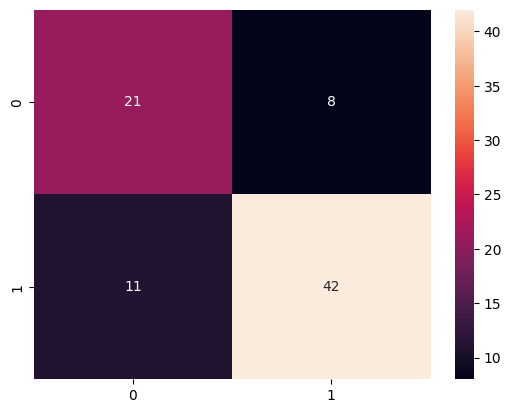

In [40]:
#SVM
print("SVM")
from sklearn import svm
sup = svm.SVC(kernel='poly')
sup.fit(X_train,y_train)
pred = sup.predict(X_test)
print("ACCURACY score on train data",accuracy_score(y_train, sup.predict(X_train))*100)
print("Accuracy Score on test data", accuracy_score(y_test,pred)*100)
print("Classification Report\n",classification_report(y_test,pred),"\n")
print("Confusion Matrix",confusion_matrix(y_test,pred))
sns.heatmap(confusion_matrix(y_test,pred),annot=True,fmt='d')

In [41]:
#All Model Accuracy with Visual------6 models
Algo=[tree,KNN,nb_model,lr_model,rf_classifier,sup]
Scores=[]
for K in Algo:
  K.fit(X_train,y_train)
  Scores.append(K.score(X_test,y_test)*100)
Algo=["Decision Tree","K Neighbors","Naive Bayes","Logistic Regression","Random Forest","SVM"]
Table=pd.DataFrame()
Table['Algorithms']=Algo
Table['Accuracy']=Scores
Table

Algorithms   Accuracy
0        Decision Tree  71.951220
1          K Neighbors  80.487805
2          Naive Bayes  68.292683
3  Logistic Regression  74.390244
4        Random Forest  73.170732
5                  SVM  76.829268

(array([0, 1, 2, 3, 4, 5]),
 [Text(0, 0, 'Decision Tree'),
  Text(1, 0, 'K Neighbors'),
  Text(2, 0, 'Naive Bayes'),
  Text(3, 0, 'Logistic Regression'),
  Text(4, 0, 'Random Forest'),
  Text(5, 0, 'SVM')])

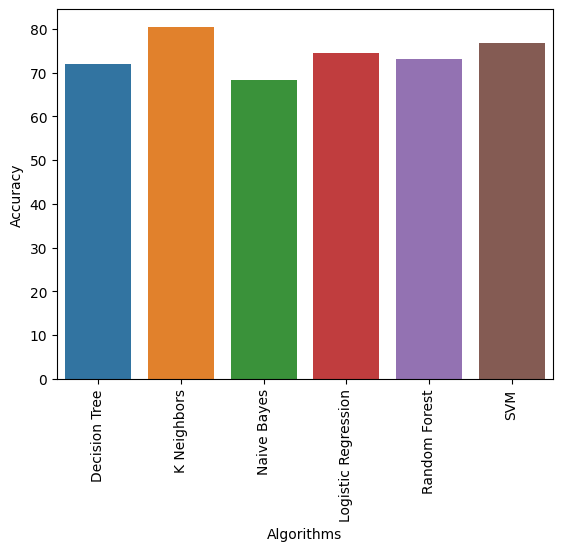

In [42]:
#Graph to show accuracy of the models
sns.barplot(x='Algorithms',y='Accuracy',data=Table)
plt.xticks(rotation=90) 

### **Exporting the tested model to a pickle file**

In [43]:
import pickle
with open('first.pkl', 'wb') as file:
  # dump information to that file
  pickle.dump(KNN, file)

In [44]:
#To give input we show data here
data.head()

Kms_Driven  Engine_Oil_Change  Brake_Pad_Change  Transmission_Fluid_Change  \
0       45000               3300             33000                      65000   
1       36000               6500             31000                      48000   
2       45000               6200             29000                      42000   
3        8000               4500             35000                      85000   
4       30000               5500             28000                      42000   

   Tire_Rotation  Spark_Plug_Change  Maintenance_Required  Year_old  
0           8000              85000                     0         5  
1          26000              50000                     1         6  
2          24000              49000                     1         9  
3           5000             105000                     0         4  
4          23000              46000                     0         6

In [45]:
#Here we give input to model and predict
predicted = KNN.predict([[45000,3300,33000,65000,8000,85000,5]])

# Print the predicted mileage
print(f"Yes=1/ No=0: {predicted[0]}")

if predicted==1:
    print ("Need of maintanance")

else:
    print ("No need for maintenance")

Yes=1/ No=0: 0
No need for maintenance


Applying Explainable AI


In [46]:
#importing shap 
import shap
import matplotlib.pyplot as plt

Variable Importance Plot - Global Interpretation


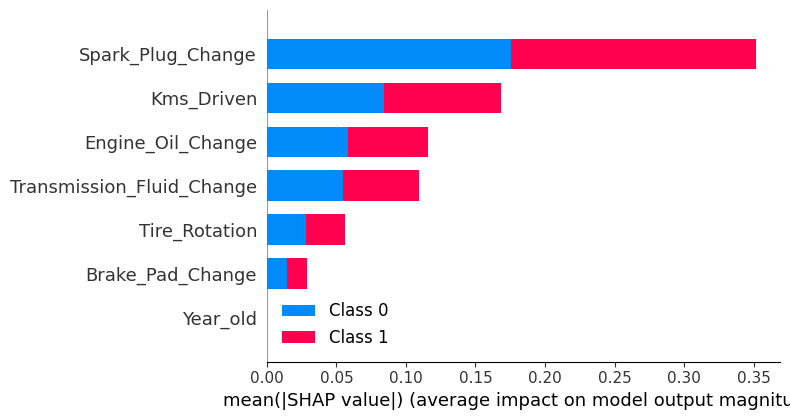

In [47]:
#Using decision Tree model
# load JS visualization code to notebook
shap.initjs()

# Create the explainer
explainer = shap.TreeExplainer(tree)

shap_values = explainer.shap_values(X_test)

print("Variable Importance Plot - Global Interpretation")
figure = plt.figure()
shap.summary_plot(shap_values, X_test,feature_names=X.columns)


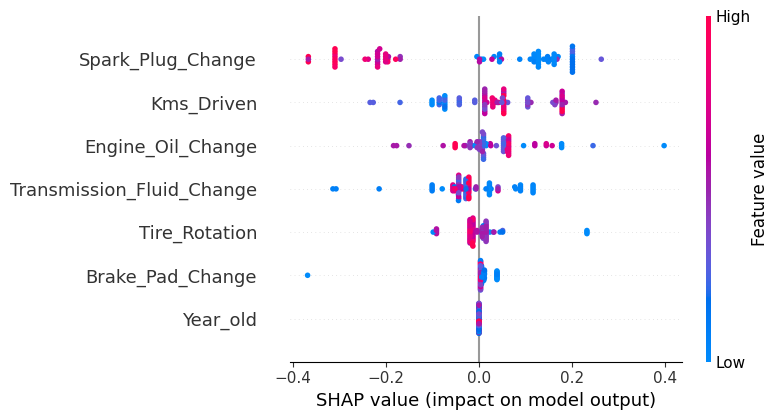

In [48]:
shap.summary_plot(shap_values[1], X_test,feature_names=X.columns)

Variable Importance Plot - Global Interpretation


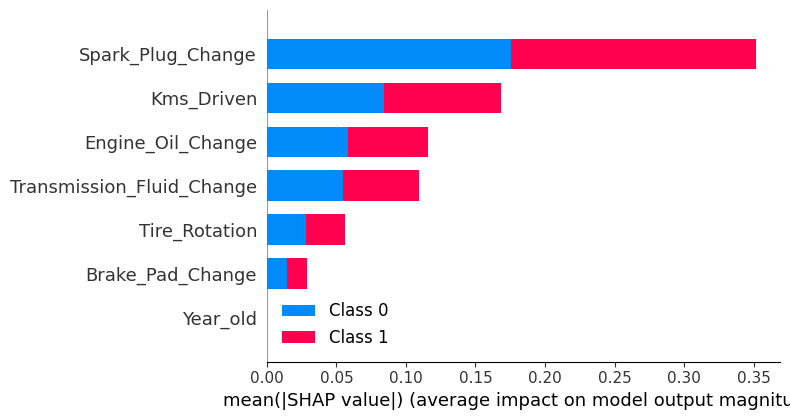

In [49]:
#Using Random Forest model
# Create the explainer
explainer1 = shap.TreeExplainer(rf_classifier)

shap_values1 = explainer1.shap_values(X_test)

print("Variable Importance Plot - Global Interpretation")
figure = plt.figure()
shap.summary_plot(shap_values, X_test,feature_names=X.columns)


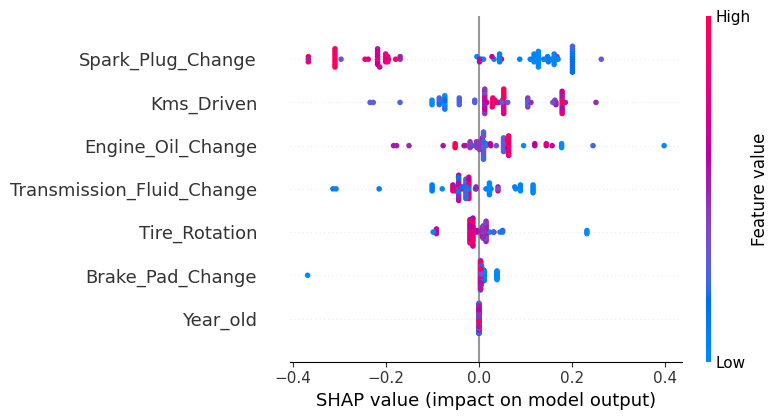

In [50]:
shap.summary_plot(shap_values[1], X_test,feature_names=X.columns)

In [51]:
feature_importances = tree.feature_importances_

In [52]:
# Create a SHAP explainer for the model
explainer = shap.Explainer(tree, X_train)

In [53]:
# Calculate SHAP values for the testing data
shap_values = explainer.shap_values(X_test)

In [54]:
# Make predictions
y_pred = tree.predict(X_test)

In [55]:
# Print individual SHAP explanations for a specific instance 
instance_index = 0
print("Predicted Class:", y_pred[instance_index])
shap.initjs()
shap.force_plot(explainer.expected_value[0], shap_values[instance_index], X_test[instance_index])

Predicted Class: 0


([0, 1, 2, 3, 4, 5, 6],
 [Text(0, 0, 'Kms_Driven'),
  Text(1, 0, 'Engine_Oil_Change'),
  Text(2, 0, 'Brake_Pad_Change'),
  Text(3, 0, 'Transmission_Fluid_Change'),
  Text(4, 0, 'Tire_Rotation'),
  Text(5, 0, 'Spark_Plug_Change'),
  Text(6, 0, 'Year_old')])

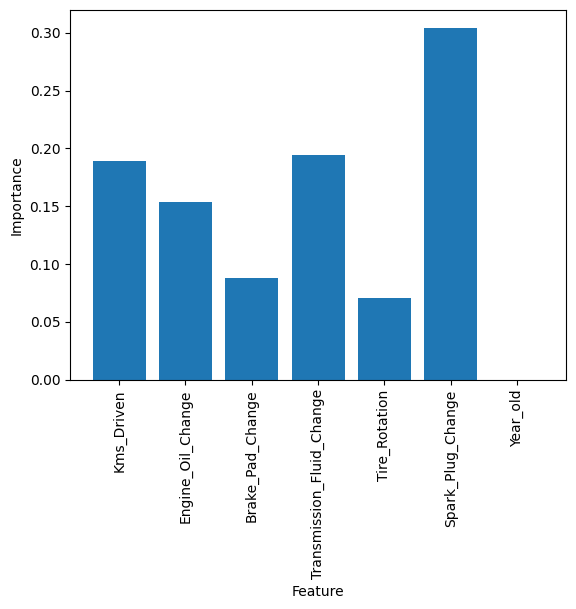

In [56]:
plt.bar(X.columns, feature_importances)
plt.xlabel('Feature')
plt.ylabel('Importance')
plt.xticks(rotation=90) 


In [57]:
#Importing LIME
import lime
from lime import lime_tabular

In [58]:
from interpret.blackbox import LimeTabular

In [59]:
from lime.lime_tabular import LimeTabularExplainer

In [60]:
from interpret import show

In [61]:
import pipeline

In [62]:
X_train_df = pd.DataFrame(X_train, columns=["Kms_Driven","Engine_Oil_Change","Brake_Pad_Change","Transmission_Fluid_Change","Tire_Rotation","Spark_Plug_Change","Year_old"])

In [63]:
X_test_df = pd.DataFrame(X_test, columns=["Kms_Driven","Engine_Oil_Change","Brake_Pad_Change","Transmission_Fluid_Change","Tire_Rotation","Spark_Plug_Change","Year_old"])

In [64]:
explainer = LimeTabularExplainer(training_data=X_train,
                                 mode="classification",
                                 feature_names=X.columns,
                                 class_names=["No need", "Need"],
                                 discretize_continuous=True,
                                 random_state=1)

In [65]:
predict_fn = lambda x: tree.predict_proba(x)

In [66]:
explanation = explainer.explain_instance(X_test_df.iloc[0], predict_fn, top_labels=1)

In [67]:
explanation.show_in_notebook()

In [68]:
# Assuming 'X_instance' is the instance for which you want an explanation
X_instance = [(25000,5000,20000,30000,15000,40000,5)]

In [69]:
X_instance_array = np.array(X_instance)

# Reshape the NumPy array
X_instance_array = X_instance_array[np.newaxis, :]
X_instance_array = X_instance_array.reshape(1, -1)
# Get the model's prediction
prediction = tree.predict(X_instance_array)[0]

In [70]:
predict_fn = lambda x: tree.predict_proba(X_instance_array)

In [71]:
# Get a local explanation using Lime
explanation1 = explainer.explain_instance(X_instance_array[0], tree.predict_proba, top_labels=1)

In [72]:
explanation1.show_in_notebook()

In [73]:
data.head()

Kms_Driven  Engine_Oil_Change  Brake_Pad_Change  Transmission_Fluid_Change  \
0       45000               3300             33000                      65000   
1       36000               6500             31000                      48000   
2       45000               6200             29000                      42000   
3        8000               4500             35000                      85000   
4       30000               5500             28000                      42000   

   Tire_Rotation  Spark_Plug_Change  Maintenance_Required  Year_old  
0           8000              85000                     0         5  
1          26000              50000                     1         6  
2          24000              49000                     1         9  
3           5000             105000                     0         4  
4          23000              46000                     0         6

In [74]:
#Here we give input to model and predict
predicted = lr_model.predict([[40000,5500,21000,33000,18000,38000,6]])

# Print the predicted mileage
print(f"Yes=1/ No=0: {predicted[0]}")

if predicted==1:
    print ("Need of maintanance")

else:
    print ("No need for maintenance")

Yes=1/ No=0: 0
No need for maintenance


In [75]:
# Assuming 'X_instance' is the instance for which you want an explanation
X_instance1 = [(40000,5500,21000,33000,18000,38000,6)]

In [76]:
X_instance_array1 = np.array(X_instance1)

# Reshape the NumPy array
X_instance_array1 = X_instance_array1[np.newaxis, :]
X_instance_array1 = X_instance_array1.reshape(1, -1)
# Get the model's prediction
prediction = tree.predict(X_instance_array1)[0]

In [77]:
predict_fn = lambda x: tree.predict_proba(X_instance_array1)

In [78]:
# Get a local explanation using Lime
explanation1 = explainer.explain_instance(X_instance_array1[0], tree.predict_proba, top_labels=1)
explanation1.show_in_notebook()